In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1
For the following 1-dimensional data points apply agglomerative hierarchical clustering to build the dendrogram.
Construct the proximity matrix (distance matrix). Merge the clusters using the single linkage (min distance) and update
the proximity matrix accordingly. Clearly show the proximity matrix corresponding to each iteration of the algorithm.
18, 22, 25, 27, 42, 43

In [30]:
data = np.array([18, 22, 25, 27, 42, 43])
n = len(data)

def create_proximity_matrix(points, labels):
    n = len(points)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            matrix[i,j] = abs(points[i] - points[j])
            matrix[j,i] = matrix[i,j]
    return matrix

current_labels = list(range(n))
current_points = data.copy()

merge_history = []
heights = []

print("Initial proximity matrix:")
prox_matrix = create_proximity_matrix(current_points, current_labels)
print(prox_matrix)

while len(current_points) > 1:
    min_val = float('inf')
    min_i, min_j = 0, 0
    for i in range(len(current_points)):
        for j in range(i+1, len(current_points)):
            if prox_matrix[i,j] < min_val:
                min_val = prox_matrix[i,j]
                min_i, min_j = i, j

    merge_history.append([current_labels[min_i], current_labels[min_j]])
    heights.append(min_val)
    
    new_point = min(current_points[min_i], current_points[min_j])
    new_label = min(current_labels[min_i], current_labels[min_j])
    
    mask = np.ones(len(current_points), dtype=bool)
    mask[[min_i, min_j]] = False
    current_points = np.append(current_points[mask], new_point)
    current_labels = [x for i,x in enumerate(current_labels) if i not in [min_i, min_j]]
    current_labels.append(new_label)

    prox_matrix = create_proximity_matrix(current_points, current_labels)
    print(f"\nProximity matrix after merging {merge_history[-1]}:")
    print(prox_matrix)

print("\nMerge history:", merge_history)
print("Heights:", heights)

Initial proximity matrix:
[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]

Proximity matrix after merging [4, 5]:
[[ 0.  4.  7.  9. 24.]
 [ 4.  0.  3.  5. 20.]
 [ 7.  3.  0.  2. 17.]
 [ 9.  5.  2.  0. 15.]
 [24. 20. 17. 15.  0.]]

Proximity matrix after merging [2, 3]:
[[ 0.  4. 24.  7.]
 [ 4.  0. 20.  3.]
 [24. 20.  0. 17.]
 [ 7.  3. 17.  0.]]

Proximity matrix after merging [1, 2]:
[[ 0. 24.  4.]
 [24.  0. 20.]
 [ 4. 20.  0.]]

Proximity matrix after merging [0, 1]:
[[ 0. 24.]
 [24.  0.]]

Proximity matrix after merging [4, 0]:
[[0.]]

Merge history: [[4, 5], [2, 3], [1, 2], [0, 1], [4, 0]]
Heights: [1.0, 2.0, 3.0, 4.0, 24.0]


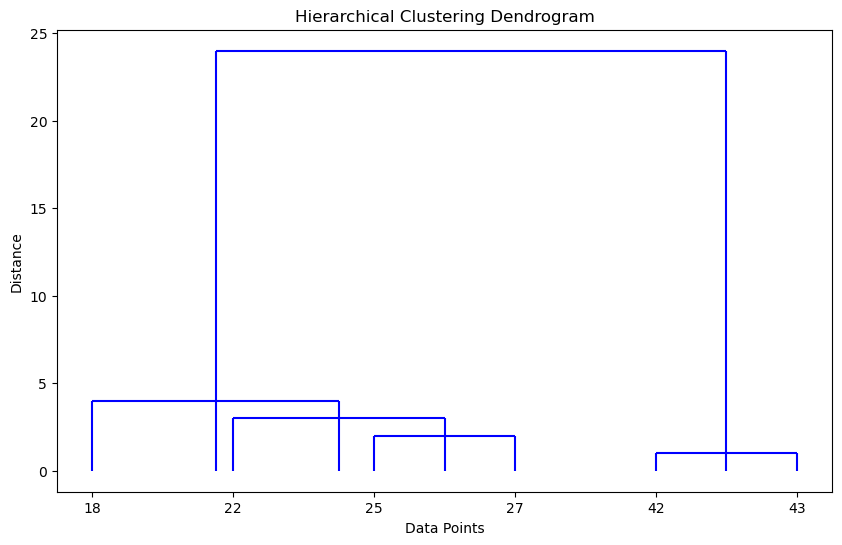

In [36]:
def plot_dendrogram(merge_history, heights, labels):
    plt.figure(figsize=(10, 6))
    n = len(labels)
    leaf_positions = {i: i for i in range(n)}
    cluster_map = {i: [i] for i in range(n)}

    for i, (merge, height) in enumerate(zip(merge_history, heights)):
        left, right = merge
        members_left = cluster_map[left]
        members_right = cluster_map[right]

        x_left = sum(leaf_positions[m] for m in members_left) / len(members_left)
        x_right = sum(leaf_positions[m] for m in members_right) / len(members_right)

        x_center = (x_left + x_right) / 2

        plt.vlines(x=x_left, ymin=0, ymax=height, colors='b')
        plt.vlines(x=x_right, ymin=0, ymax=height, colors='b')
        plt.hlines(y=height, xmin=x_left, xmax=x_right, colors='b')

        new_cluster = len(labels) + i
        cluster_map[new_cluster] = members_left + members_right

        for member in cluster_map[new_cluster]:
            leaf_positions[member] = x_center


    plt.xticks(range(n), labels)
    plt.ylabel('Distance')
    plt.xlabel('Data Points')
    plt.title('Hierarchical Clustering Dendrogram')
    plt.show()
plot_dendrogram(merge_history, heights, data)

# Question 2
Consider the following data set and apply the hierarchical data-clustering algorithm, to identify the clusters. Solve it manually by considering all linkage functions (Single, Complete and Average) using Euclidean distance.

In [22]:
df2 = pd.read_csv('q2.csv')

In [23]:
df2

,Point,x,y
0,P1,1,1
1,P2,3,2
2,P3,9,1
3,P4,3,7
4,P5,7,2
5,P6,9,7
6,P7,4,8
7,P8,8,3
8,P9,1,4


Single Linkage: [[5, 2, 4, 7, 3, 6, 8, 0, 1]]


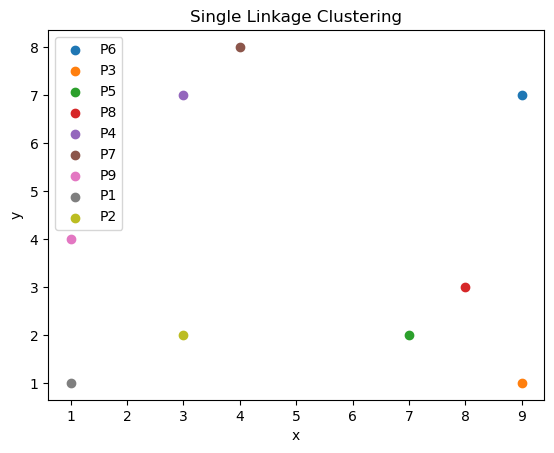

Complete Linkage: [[5, 3, 6, 2, 4, 7, 8, 0, 1]]


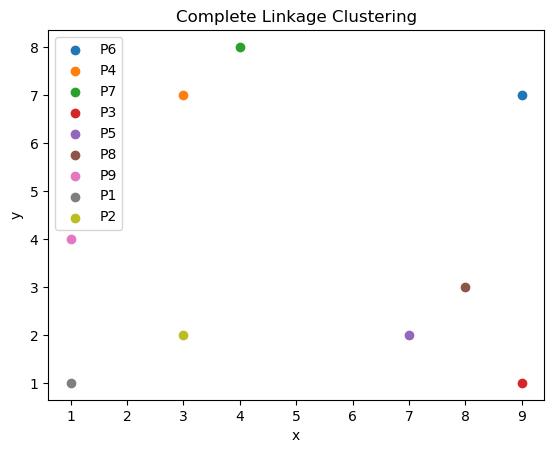

Average Linkage: [[5, 2, 4, 7, 3, 6, 8, 0, 1]]


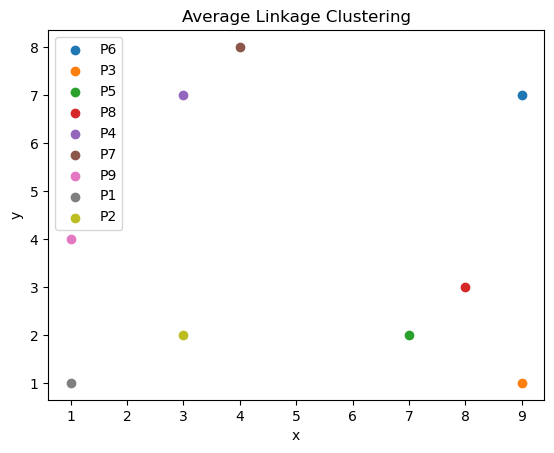

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('q2.csv')
points = df['Point'].values
X = df[['x', 'y']].values

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def hierarchical_clustering(X, linkage):
    n = X.shape[0]
    clusters = [[i] for i in range(n)]
    distances = {}
    for i in range(n):
        for j in range(i + 1, n):
            distances[(i, j)] = euclidean_distance(X[i], X[j])

    linkage_functions = {
        'single': lambda x, y: np.min(x),
        'complete': lambda x, y: np.max(x),
        'average': lambda x, y: np.mean(x)
    }

    linkage_func = linkage_functions[linkage]

    while len(clusters) > 1:
        min_dist = float('inf')
        min_pair = None
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = []
                for idx1 in clusters[i]:
                    for idx2 in clusters[j]:
                        if (idx1, idx2) in distances:
                            dist.append(distances[(idx1, idx2)])
                        else:
                            dist.append(distances[(idx2, idx1)])
                
                cluster_dist = linkage_func(dist,0)
                if cluster_dist < min_dist:
                    min_dist = cluster_dist
                    min_pair = (i, j)

        merged_cluster = clusters[min_pair[0]] + clusters[min_pair[1]]
        clusters.pop(max(min_pair))
        clusters.pop(min(min_pair))
        clusters.append(merged_cluster)

    return clusters

linkages = ['single', 'complete', 'average']
for linkage in linkages:
    clusters = hierarchical_clustering(X, linkage)
    print(f"{linkage.capitalize()} Linkage: {clusters}")

    plt.figure()
    for i in range(len(clusters[0])):
        idx = clusters[0][i]
        plt.scatter(X[idx, 0], X[idx, 1], label=points[idx])
    plt.title(f'{linkage.capitalize()} Linkage Clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Question 3
Consider the above-mentioned data set in Q no 1 and apply the hierarchical data-clustering algorithm, to identify the clusters. Write a Python function (without using the scikit-learn library) to do the following:\
a. Plot a scatter graph of given data points. \
b. Display the proximity matrix using Euclidean distance, Manhattan distance, and Minkowski distance. \
c. Plot the dendrogram for single, complete and average linkage methods.

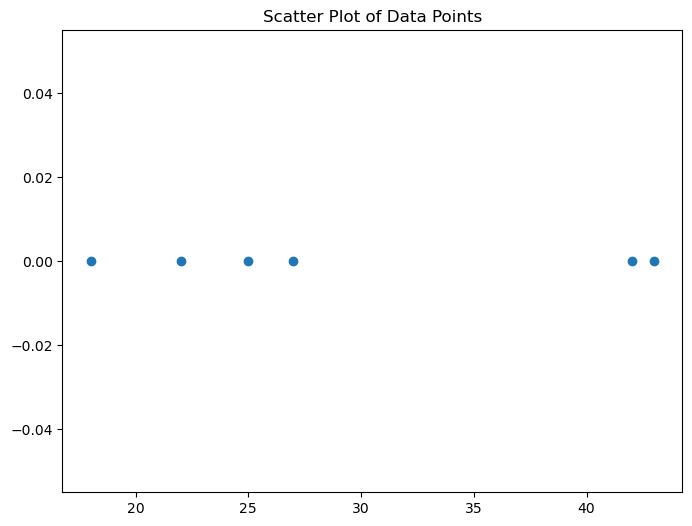


Euclidean Distance Matrix:
      0     1     2     3     4     5
0   0.0   4.0   7.0   9.0  24.0  25.0
1   4.0   0.0   3.0   5.0  20.0  21.0
2   7.0   3.0   0.0   2.0  17.0  18.0
3   9.0   5.0   2.0   0.0  15.0  16.0
4  24.0  20.0  17.0  15.0   0.0   1.0
5  25.0  21.0  18.0  16.0   1.0   0.0

Manhattan Distance Matrix:
      0     1     2     3     4     5
0   0.0   4.0   7.0   9.0  24.0  25.0
1   4.0   0.0   3.0   5.0  20.0  21.0
2   7.0   3.0   0.0   2.0  17.0  18.0
3   9.0   5.0   2.0   0.0  15.0  16.0
4  24.0  20.0  17.0  15.0   0.0   1.0
5  25.0  21.0  18.0  16.0   1.0   0.0

Minkowski Distance Matrix:
      0     1     2     3     4     5
0   0.0   4.0   7.0   9.0  24.0  25.0
1   4.0   0.0   3.0   5.0  20.0  21.0
2   7.0   3.0   0.0   2.0  17.0  18.0
3   9.0   5.0   2.0   0.0  15.0  16.0
4  24.0  20.0  17.0  15.0   0.0   1.0
5  25.0  21.0  18.0  16.0   1.0   0.0


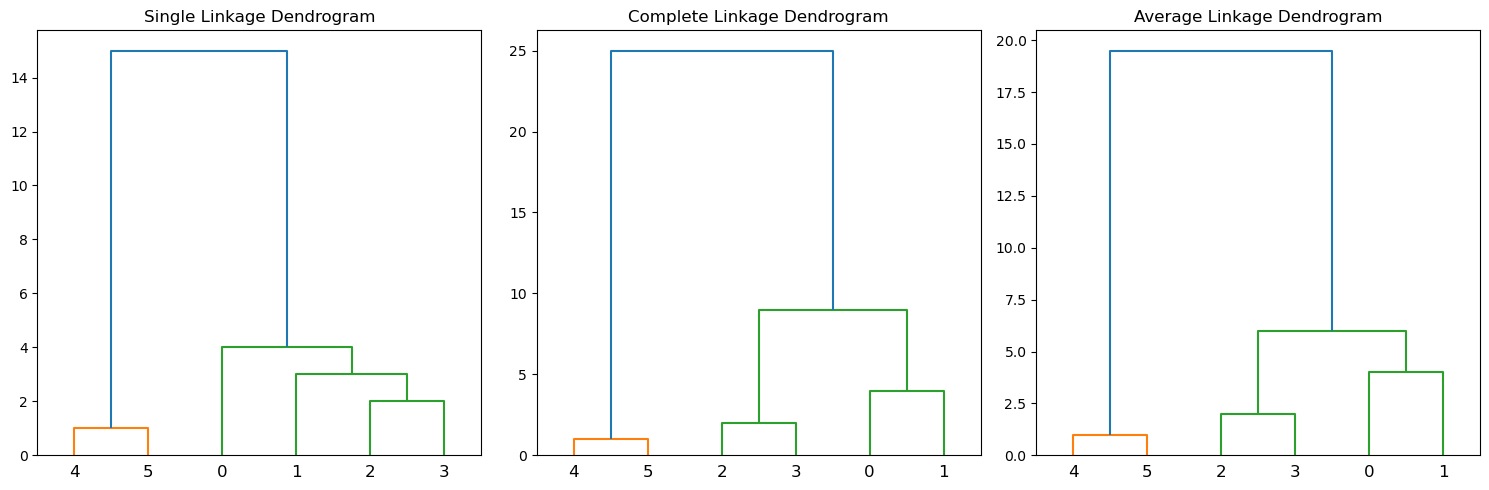

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

data = np.array([18, 22, 25, 27, 42, 43]).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.scatter(data, np.zeros_like(data))
plt.title('Scatter Plot of Data Points')
plt.show()

euclidean_dist = pdist(data, metric='euclidean')
manhattan_dist = pdist(data, metric='cityblock')
minkowski_dist = pdist(data, metric='minkowski', p=3)

proximity_matrices = {
    'Euclidean': squareform(euclidean_dist),
    'Manhattan': squareform(manhattan_dist),
    'Minkowski': squareform(minkowski_dist)
}

for name, matrix in proximity_matrices.items():
    print(f"\n{name} Distance Matrix:")
    print(pd.DataFrame(matrix))

linkage_methods = ['single', 'complete', 'average']
plt.figure(figsize=(15, 5))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)
    linked = linkage(data, method=method)
    dendrogram(linked)
    plt.title(f'{method.capitalize()} Linkage Dendrogram')

plt.tight_layout()
plt.show()